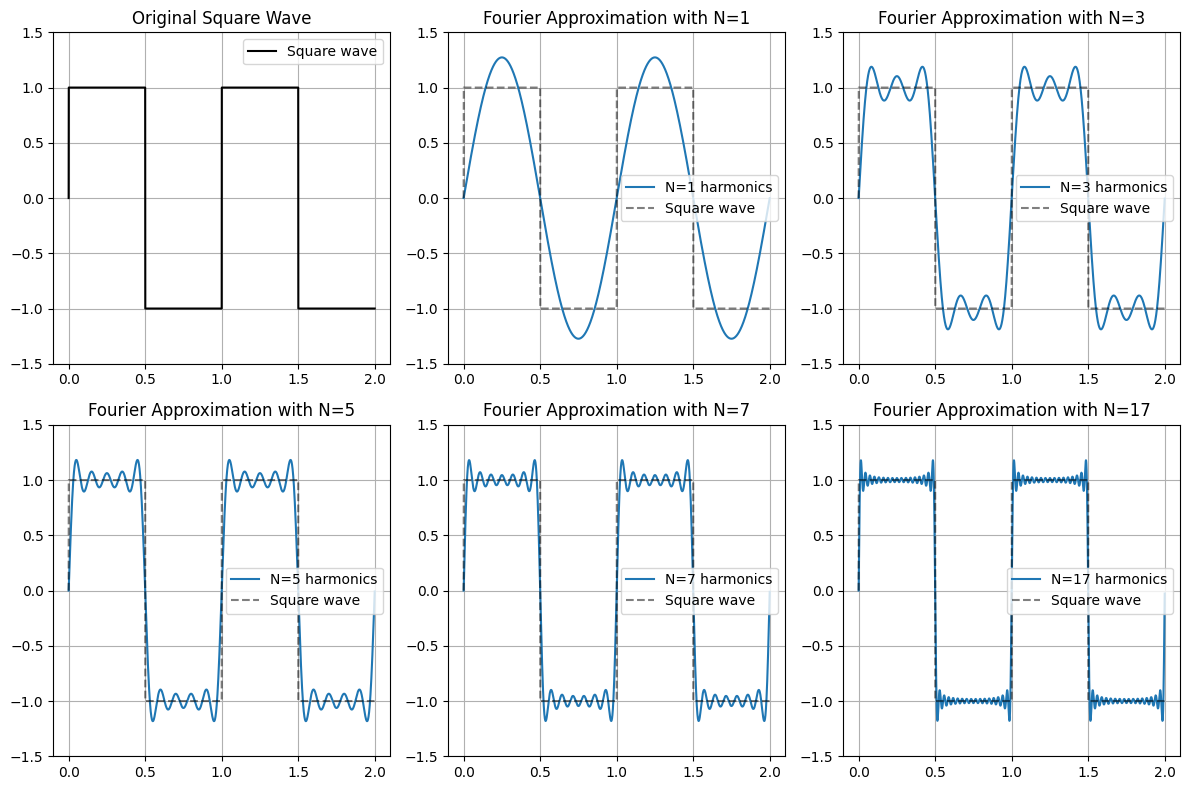

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set parameters for the signal
N = 10000          # Number of sample points
T = 2.0           # Duration of the signal in seconds
f0 = 1            # Fundamental frequency of the square wave in Hz

# List of harmonic numbers used to construct the square wave
harmonics = [1,3,5,7,17]

# Define the square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        # The Fourier series of a square wave contains only odd harmonics.
        n = 2 * k + 1
        # Add harmonics to reconstruct the square wave.
        result += np.sin(2 * np.pi * n * f0 * t) / n
    return (4 / np.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)

# Generate the original square wave
square = square_wave(t)

plt.figure(figsize=(12, 8))

# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()

# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


DFT computation code:

In [6]:
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

In [8]:
import numpy as np

def naive_dft(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.
    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).

    Args:
        x (np.ndarray): The input signal, a 1D NumPy array.

    Returns:
        np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)

    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)

    return X   # <-- return must be OUTSIDE both loops


--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 0.932411 seconds
NumPy FFT Execution Time: 0.600286 seconds
FFT is approximately 1.55 times faster.

Our DFT implementation is close to NumPy's FFT: True


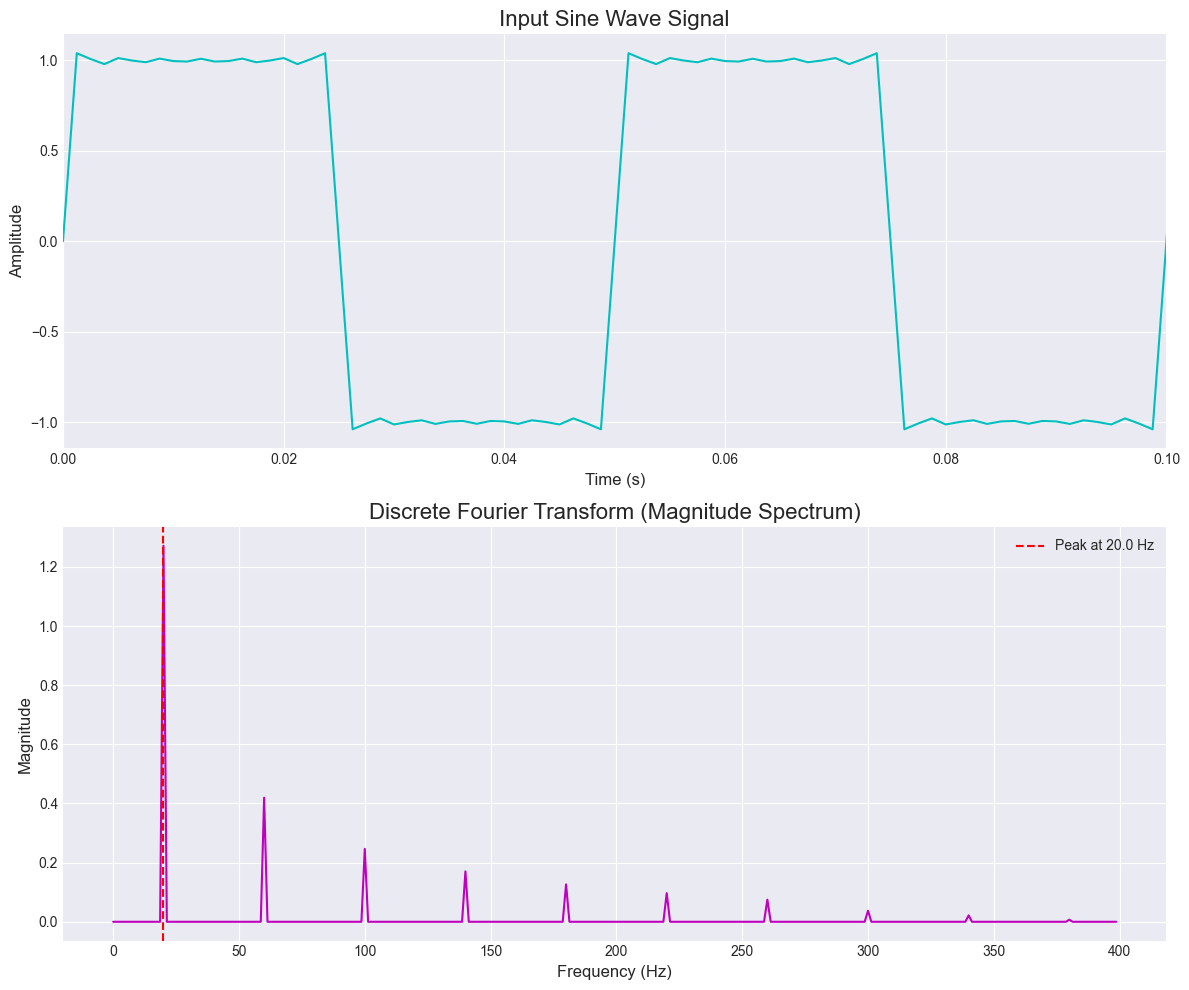

In [9]:
# --- Main Script ---

# 1. Generate the Signal
# Parameters for the signal
N = 600                # Number of sample points
SAMPLE_RATE = 800.0    # Sampling rate in Hz
FREQUENCY = 50.0       # Frequency of the sine wave in Hz

# Calculate sample spacing
T = 1.0 / SAMPLE_RATE

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, N * T, N, endpoint=False)

#redefine these
f0 = 20            # Fundamental frequency of the square wave in Hz
Nh = 33

# Create the sine wave signal
y = square_wave_fourier(t, f0, Nh)

# 2. Apply the DFT and Time the Execution

# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(y)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(y)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")


# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, T)[:N//2]

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t, y, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 0.1) # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])
ax2.plot(xf, magnitude, color='m')
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.grid(True)

# Add a vertical line to mark the peak frequency
peak_freq_index = np.argmax(magnitude)
peak_freq = xf[peak_freq_index]
ax2.axvline(peak_freq, color='r', linestyle='--', label=f'Peak at {peak_freq:.1f} Hz')
ax2.legend()


plt.tight_layout()
plt.show()

We see a big spike for fundimental frequency and smaller spikes as we move along harmonics. We hit the "Nyquist limit" because our sample rate is too low. If we raise it, we can capture more detail in our freuqnecy anlysis

 With an AI of you choice or by hand using this code provided, you should be able to (re)use the
 code in a script or notebook locally or re-generate it using AI because you will need to modify the code
 in the next step. Now modify the ’square_wave’, ’square_wave_fourier’ and ’naive_dft’ functions so
 that they are implemented using TensorFlow (TF) or PyTorch operations. For ’naive_dft’ in particular,
 create a second version that explicitly runs on the GPU using TF/PyTorch tensor operations (rather
 than their built-in FFT functions, which behave similarly to NumPy’s implementation). Compare its
 computation time with the other two methods, note the times in order of fastest to slowest. Change the
 size of the data and note the change in timings of the three methods. Can you explain the order of the
 methods in terms of time, i.e., why is the fastest method the fastest you have observed?

In [13]:
import torch
import math
import time

# --- 1. Square wave in PyTorch ---
def square_wave_torch(t, f0):
    # sin → sign to create square wave
    return torch.sign(torch.sin(2.0 * math.pi * f0 * t))

# --- 2. Fourier series approximation of square wave ---
def square_wave_fourier_torch(t, f0, num_harmonics):
    result = torch.zeros_like(t)
    for k in range(num_harmonics):
        n = 2 * k + 1  # odd harmonics only
        result += torch.sin(2 * math.pi * n * f0 * t) / n
    return (4 / math.pi) * result

# --- 3. Naive DFT (CPU) ---
def naive_dft_torch(x):
    N = x.shape[0]
    X = torch.zeros(N, dtype=torch.complex128)
    for k in range(N):
        for n in range(N):
            angle = -2j * math.pi * k * n / N
            X[k] += x[n] * torch.exp(torch.tensor(angle))
    return X

# --- 4. Naive DFT (GPU, fully vectorized) ---
def naive_dft_torch_gpu(x):
    N = x.shape[0]
    n = torch.arange(N, device=x.device)
    k = n.view(-1, 1)

    # Build the DFT matrix using complex dtype matching x
    M = torch.exp(-2j * math.pi * k * n / N).to(torch.complex64)

    # Ensure input is complex
    x = x.to(torch.complex64)

    # Matrix multiply
    X = torch.matmul(M, x)
    return X


In [20]:
# Prepare input data
N = 1000
T = 1.0
f0 = 1.0
t = torch.linspace(0.0, T, N, dtype=torch.float64, device='cpu')

# Generate signal
signal = square_wave_fourier_torch(t, f0, 50)

# Time CPU Naive DFT
# Python loop, very slow compared to paralel operation on gpu
start = time.time()
X_cpu = naive_dft_torch(signal)
end = time.time()
cpu_time = end - start

# Time GPU Naive DFT
#O(N^2) but crunched on gpu with each operation run in parellel
signal_gpu = signal.to('cuda')
torch.cuda.synchronize()
start = time.time()
X_gpu = naive_dft_torch_gpu(signal_gpu)
torch.cuda.synchronize()
end = time.time()
gpu_time = end - start

# Time NumPy FFT for comparison
import numpy as np
signal_np = signal.cpu().numpy()
start = time.perf_counter()
#Fast Fourier Transform algorithm in np, which reduces complexity to O(N log N) instead of o(N^2)
X_fft = np.fft.fft(signal_np)
end = time.perf_counter()
fft_time = end - start

print(f"Naive DFT (CPU): {cpu_time:.6f}s")
print(f"Naive DFT (GPU): {gpu_time:.6f}s")
print(f"NumPy FFT: {fft_time:.30f}s")


Naive DFT (CPU): 42.298954s
Naive DFT (GPU): 0.004975s
NumPy FFT: 0.000251899997238069772720336914s
